<div style="color:green;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 15px;
              color:black;
              text-align:center;'>
        FLIGHT PRICE PREDICTION
    </h2>
    </div>

<div style="color:green;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 15px;
              color:black;
              text-align:center;'>
    Import  Libraries
    </h2>
    </div>

In [1]:
import numpy as np #liner algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<div style="color:green;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 15px;
              color:black;
              text-align:center;'>
    Data Preprocessing
    </h2>
    </div>

In [2]:
df=pd.read_csv("train_data.csv",index_col='id')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,20000.0,12.177627,7.157944,0.83,6.83,11.25,16.08,38.58
days_left,20000.0,25.924150,13.624874,1.00,14.00,26.00,38.00,49.00
price,20000.0,20960.281700,22775.459535,1105.00,4783.00,7425.00,42521.00,114523.00


In [5]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
print("\t\t\tUnique values\n")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} - {df[col].unique()}")

			Unique values

airline - ['Vistara' 'SpiceJet' 'Indigo' 'Air_India' 'GO_FIRST' 'AirAsia']
flight - ['UK-810' 'SG-5094' 'UK-846' ... 'AI-489' 'G8-213' '6E-7201']
source_city - ['Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai']
departure_time - ['Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops - ['one' 'zero' 'two_or_more']
arrival_time - ['Night' 'Evening' 'Morning' 'Afternoon' 'Early_Morning' 'Late_Night']
destination_city - ['Mumbai' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Bangalore']
class - ['Economy' 'Business']


In [8]:
df['air']=df['source_city'] + '-' + df['destination_city']

In [9]:
df['air'] = df.air.replace('Delhi-Mumbai','Mumbai-Delhi')
df['air'] = df.air.replace('Delhi-Bangalore','Bangalore-Delhi')
df['air'] = df.air.replace('Bangalore-Mumbai','Mumbai-Bangalore')
df['air'] = df.air.replace('Mumbai-Kolkata','Kolkata-Mumbai')
df['air'] = df.air.replace('Delhi-Kolkata','Kolkata-Delhi')
df['air'] = df.air.replace('Delhi-Chennai','Chennai-Delhi')
df['air'] = df.air.replace('Mumbai-Hyderabad','Hyderabad-Mumbai')
df['air'] = df.air.replace('Mumbai-Chennai','Chennai-Mumbai')
df['air'] = df.air.replace('Bangalore-Kolkata','Kolkata-Bangalore')
df['air'] = df.air.replace('Delhi-Hyderabad','Hyderabad-Delhi')
df['air'] = df.air.replace('Bangalore-Hyderabad','Hyderabad-Bangalore')
df['air'] = df.air.replace('Hyderabad-Kolkata','Kolkata-Hyderabad')
df['air'] = df.air.replace('Chennai-Kolkata','Kolkata-Chennai')
df['air'] = df.air.replace('Chennai-Bangalore','Bangalore-Chennai')
df['air'] = df.air.replace('Hyderabad-Chennai','Chennai-Hyderabad')

<div style="color:green;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
    Data Visualition
    </h2>
    </div>

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,air
id,,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212,Mumbai-Bangalore
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292,Kolkata-Hyderabad
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553,Bangalore-Delhi
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760,Kolkata-Hyderabad
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712,Chennai-Mumbai


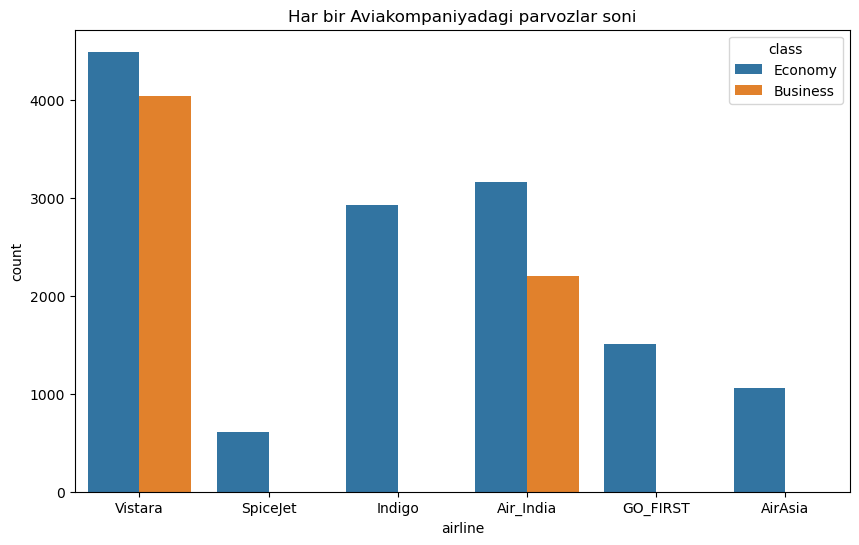

In [11]:
plt.figure(figsize=(10,6))
plt.title("Har bir Aviakompaniyadagi parvozlar soni")
sns.countplot(data=df, x='airline',hue='class')
plt.show()

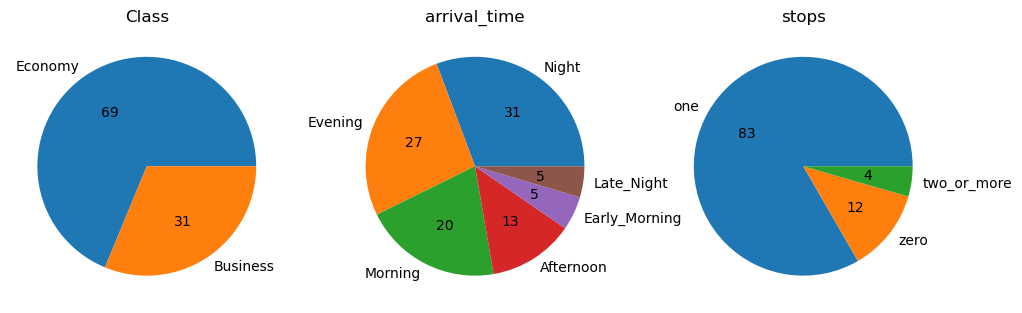

In [12]:
fig , ax = plt.subplots(1,3,figsize=(12,6))

for i,col in enumerate(['class','arrival_time','stops']):
    ax[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%.f')
    
ax[0].set_title("Class")
ax[1].set_title("arrival_time")
ax[2].set_title("stops")
plt.show()

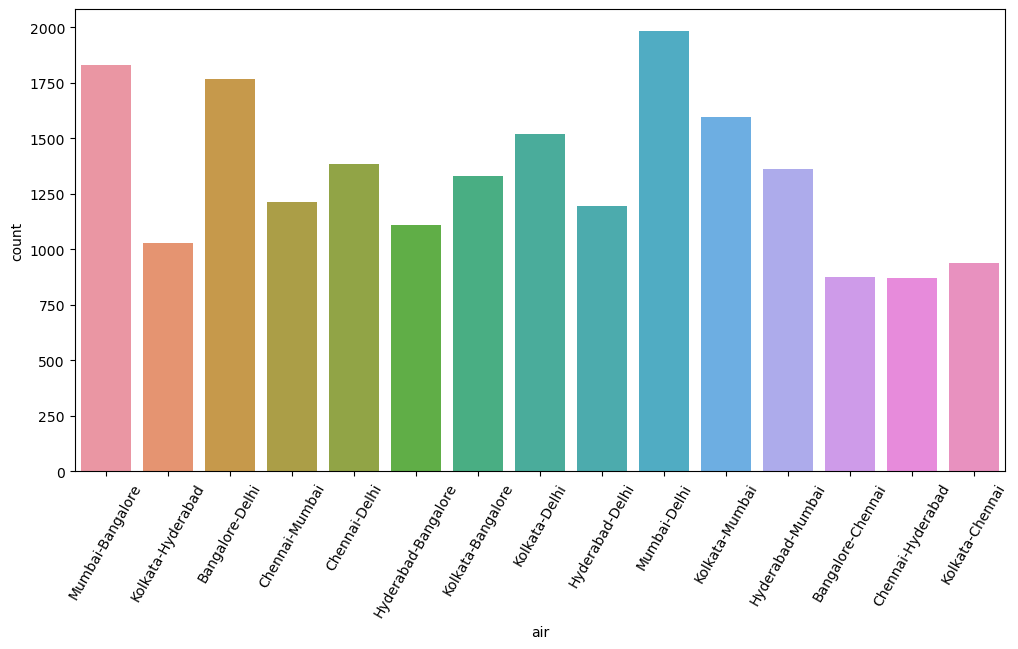

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x= 'air')
plt.xticks(rotation='60')
plt.show()

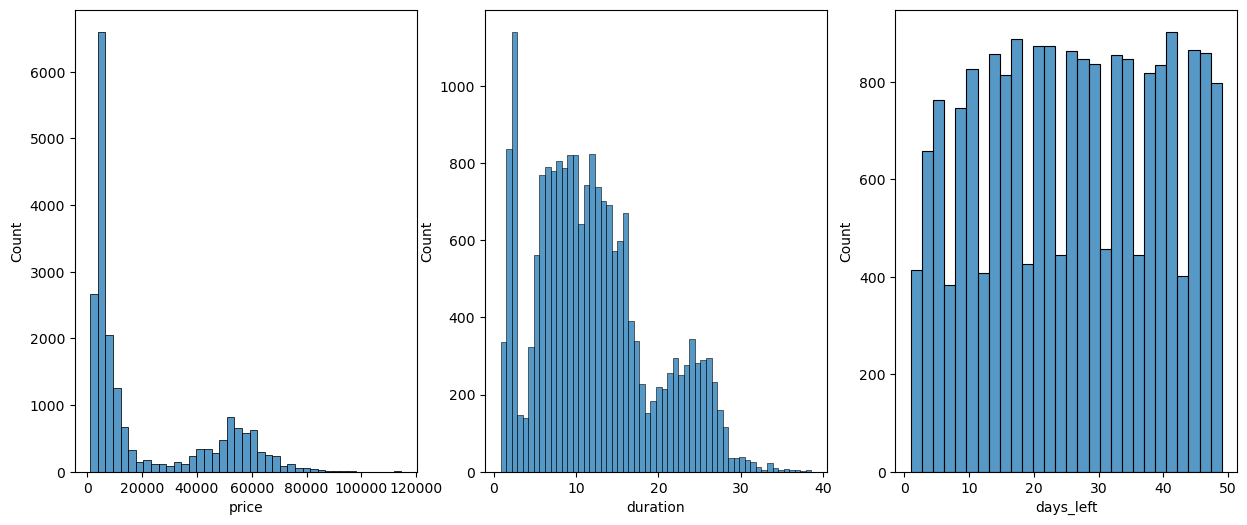

In [14]:
fig , ax = plt.subplots(1,3,figsize=(15,6))

for i , col in enumerate(['price','duration','days_left']):
    sns.histplot(data=df,x=col,ax=ax[i])

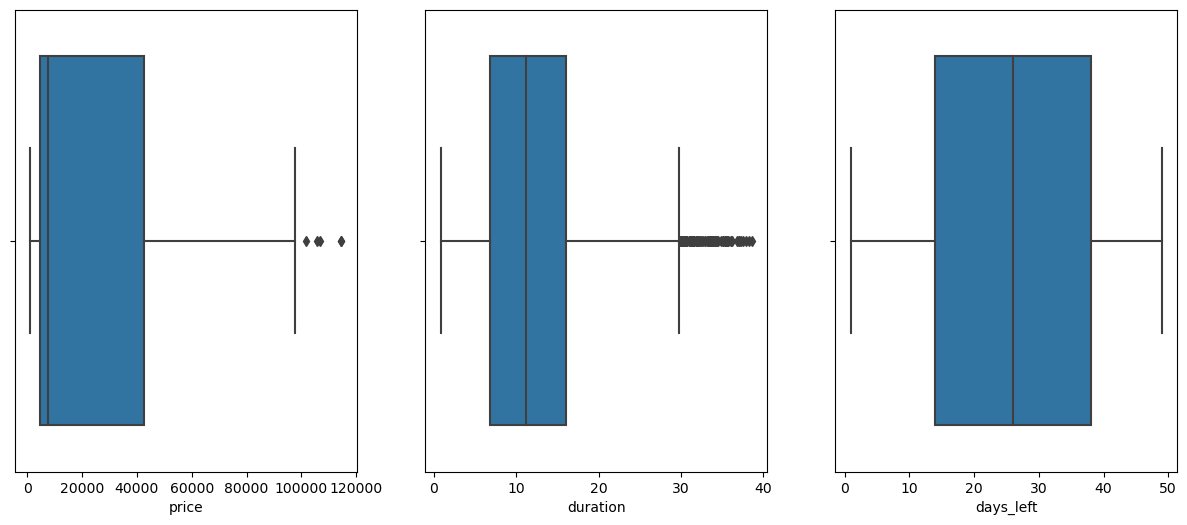

In [15]:
fig , ax = plt.subplots(1,3,figsize=(15,6))
for i , col in enumerate(['price','duration','days_left']):
    sns.boxplot(data=df,x=col,ax=ax[i])

<AxesSubplot:>

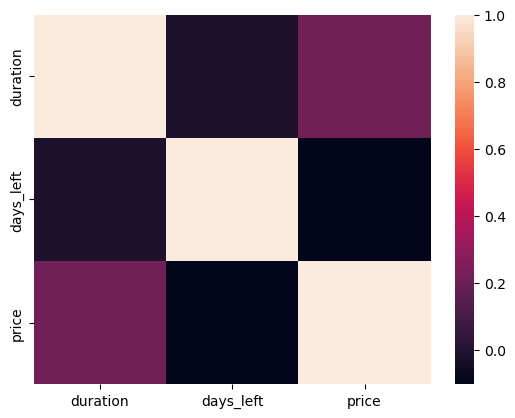

In [16]:
sns.heatmap(df.corr())

<div style="color:green;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 15px;
              color:black;
              text-align:center;'>
    Machine Learning
    </h2>
    </div>

In [17]:
X=df.drop(labels=['source_city','destination_city','price'],axis=1)
y=df['price'].values

In [18]:
X

,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,air
id,,,,,,,,,
1,Vistara,UK-810,Early_Morning,one,Night,Economy,14.25,21,Mumbai-Bangalore
2,SpiceJet,SG-5094,Evening,zero,Night,Economy,1.75,7,Kolkata-Hyderabad
3,Vistara,UK-846,Morning,one,Evening,Business,9.58,5,Bangalore-Delhi
4,Vistara,UK-706,Morning,one,Evening,Economy,6.75,28,Kolkata-Hyderabad
5,Indigo,6E-5394,Early_Morning,zero,Morning,Economy,2.00,4,Chennai-Mumbai
...,...,...,...,...,...,...,...,...,...
19996,Indigo,6E-6178,Night,one,Early_Morning,Economy,7.92,45,Mumbai-Bangalore
19997,AirAsia,I5-582,Morning,one,Afternoon,Economy,5.83,24,Kolkata-Delhi
19998,Vistara,UK-832,Early_Morning,two_or_more,Evening,Economy,35.33,17,Bangalore-Chennai


In [19]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()

X[X.columns[X.dtypes=='object']] = encoder.fit_transform(X[X.columns[X.dtypes=='object']])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X=scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import GridSearchCV

# LinearRegression

In [37]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_predict=linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_predict))
mea = mean_absolute_error(y_test,y_predict)

print("\t\tLinear Regressor Result")
print(f"RMSE: {rmse}")
print(f"MAE: {mea}")

		Linear Regressor Result
RMSE: 7223.2532054125495
MAE: 4654.9916287719125


# DecisionTreeRegressor

In [39]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_predict))
mea = mean_absolute_error(y_test,y_predict)

print("\t\tDecisionTree Regressor Result")
print(f"RMSE: {rmse}")
print(f"MAE: {mea}")

		DecisionTree Regressor Result
RMSE: 4505.487839388205
MAE: 1949.289


# RandomForestRegressor

In [48]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_predict))
mea = mean_absolute_error(y_test,y_predict)

print("\t\tRandomForest Regressor Result")
print(f"RMSE: {rmse}")
print(f"MAE: {mea}")

		RandomForest Regressor Result
RMSE: 3348.879429759556
MAE: 1637.771946125


# ExtraTreesRegressor

In [45]:
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_predict))
mea = mean_absolute_error(y_test,y_predict)

print("\t\t ExtraTreesRegressor Result")
print(f"RMSE: {rmse}")
print(f"MAE: {mea}")

		 ExtraTreesRegressor Result
RMSE: 3527.340977652717
MAE: 1729.8966500000001


# Hypertune model

In [ ]:
model = ExtraTreesRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [None, 5, 10]
}


grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)